####################################################################
Author : Nandhakumar Thangavelu
Project : CS7641 Machine Learning - Assignment #4
####################################################################

#### Problem - frozen lake

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.utils import info
import pandas as pd
from hiive.mdptoolbox.example import forest
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning
import math
import time
from openai_mdp import OpenAI_MDPToolbox
import gym
import gym.spaces as spaces
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv

In [2]:
frozen_lake_environment = gym.make('FrozenLake-v1')

#gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
gammas = np.arange(0.01, 1.0, 0.01).tolist()

frozen_lake = OpenAI_MDPToolbox('FrozenLake-v1')
probability_matrix = frozen_lake.P
reward_matrix = frozen_lake.R
problem = "frozenlake"

#### Value Iteration

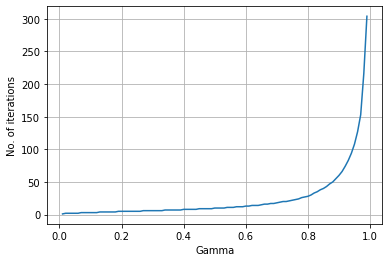

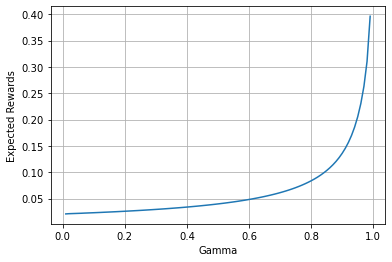

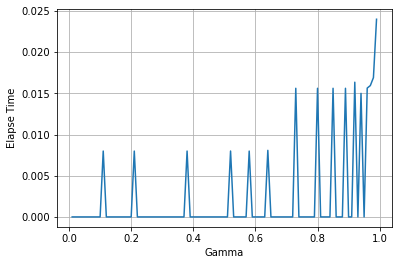

In [11]:
# value_iteration
mdp = 'Value Iteration'
iterations_until_converge_gamma = []
expected_rewards_gamma = []
elapse_time_gamma = []

for g in gammas:
    vi = ValueIteration(probability_matrix, reward_matrix, gamma=g, epsilon=0.0001)
    vi.run()

    iterations_until_converge_gamma.append(vi.iter)
    expected_rewards_gamma.append(np.mean(vi.V))
    elapse_time_gamma.append(vi.time)

title = mdp + " (Gamma) vs Iterations"

plt.plot(gammas, iterations_until_converge_gamma)
plt.xlabel('Gamma')
plt.ylabel('No. of iterations')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Gamma) vs Rewards"

plt.plot(gammas, expected_rewards_gamma)
plt.xlabel('Gamma')
plt.ylabel('Expected Rewards')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Gamma) vs Time"

plt.plot(gammas, elapse_time_gamma)
plt.xlabel('Gamma')
plt.ylabel('Elapse Time')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

In [12]:
##Test Policy
gamma =0.99
n_episodes=10000

vi = ValueIteration(probability_matrix, reward_matrix, gamma=gamma, epsilon=0.0001)
start_time = time.time()
vi.run()
end_time = time.time()
total_time = end_time - start_time
policy_for_test = vi.policy

test_expected_rewards_list = []
for episode in range(n_episodes):
    env_observation_init = frozen_lake_environment.reset()
    env_observation = env_observation_init[0]
    cumulative_rewards = 0
    number_of_steps = 0
    env_done = False
    while True:
        env_observation, env_reward, env_terminated, env_truncated, \
        env_info  = frozen_lake_environment.step(policy_for_test[env_observation])
        if env_terminated is True or env_truncated is True:
            env_done = True
        cumulative_rewards += (gamma ** number_of_steps) * env_reward
        number_of_steps += 1
        if env_done:
            break
    test_expected_rewards_list.append(cumulative_rewards)
    
print("Optimal total reward : ", str(np.mean(test_expected_rewards_list)))

success_count = 0
number_of_steps_list = []
for episode in range(n_episodes):
    env_observation = frozen_lake_environment.reset()
    env_observation = env_observation_init[0]
    number_of_steps = 0
    run = True
    env_done = False
    while run:
        env_observation, env_reward, env_terminated, env_truncated, \
        env_info  = frozen_lake_environment.step(policy_for_test[env_observation])
        if env_terminated is True or env_truncated is True:
            env_done = True
        number_of_steps += 1
        if env_done:
            run = False
            if env_reward == 1:
                number_of_steps_list.append(number_of_steps)
                success_count += 1

print("Number of steps : ", str(number_of_steps))
print("Number of steps (average) : ", str(np.mean(number_of_steps)))
success_rate = (success_count / n_episodes) * 100
print("Success rate : ", str(success_rate), "%")

print("Total run time : ", str(total_time))

Optimal total reward :  0.5160827824251654
Number of steps :  100
Number of steps (average) :  100.0
Success rate :  74.45 %
Total run time :  0.04362988471984863


#### Policy Iteration

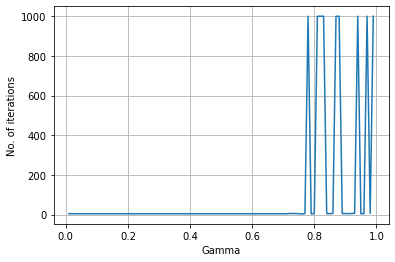

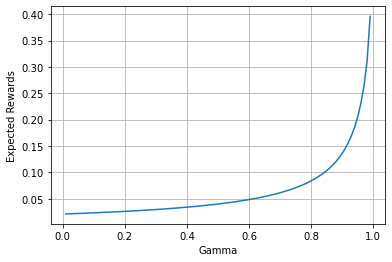

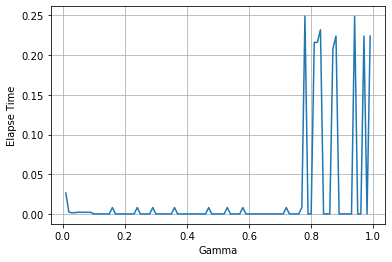

In [5]:
# policy_iteration
mdp = 'Policy Iteration'
iterations_until_converge_gamma = []
expected_rewards_gamma = []
elapse_time_gamma = []

for g in gammas:
    pi = PolicyIteration(probability_matrix, reward_matrix, gamma=g)
    pi.run()

    ## Getting Stats
    iterations_until_converge_gamma.append(pi.iter)
    expected_rewards_gamma.append(np.mean(pi.V))
    elapse_time_gamma.append(pi.time)

title = mdp + " (Gamma) vs Iterations"

plt.plot(gammas, iterations_until_converge_gamma)
plt.xlabel('Gamma')
plt.ylabel('No. of iterations')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Gamma) vs Rewards"

plt.plot(gammas, expected_rewards_gamma)
plt.xlabel('Gamma')
plt.ylabel('Expected Rewards')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Gamma) vs Time"

plt.plot(gammas, elapse_time_gamma)
plt.xlabel('Gamma')
plt.ylabel('Elapse Time')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

In [6]:
##Test Policy
gamma =0.99
n_episodes=10000

pi = PolicyIteration(probability_matrix, reward_matrix, gamma=gamma)
start_time = time.time()
pi.run()
end_time = time.time()
total_time = end_time - start_time
policy_for_test = pi.policy

test_expected_rewards_list = []
for episode in range(n_episodes):
    env_observation_init = frozen_lake_environment.reset()
    env_observation = env_observation_init[0]
    env_done = False
    cumulative_rewards = 0
    number_of_steps = 0
    while True:
        env_observation, env_reward, env_terminated, env_truncated,  \
        env_info  = frozen_lake_environment.step(policy_for_test[env_observation])
        if env_terminated is True or env_truncated is True:
            env_done = True
        cumulative_rewards += (gamma ** number_of_steps) * env_reward
        number_of_steps += 1
        if env_done:
            break
    test_expected_rewards_list.append(cumulative_rewards)
    
print("Optimal total reward : ", str(np.mean(test_expected_rewards_list)))

success_count = 0
number_of_steps_list = []
for episode in range(n_episodes):
    env_observation_init = frozen_lake_environment.reset()
    env_observation = env_observation_init[0]
    env_done = False
    
    number_of_steps = 0
    run = True
    while run:
        env_observation, env_reward, env_terminated, env_truncated,  \
        env_info  = frozen_lake_environment.step(policy_for_test[env_observation])
        if env_terminated is True or env_truncated is True:
            env_done = True
        number_of_steps += 1
        if env_done:
            run = False
            if env_reward == 1:
                number_of_steps_list.append(number_of_steps)
                success_count += 1

print("Number of steps : ", str(number_of_steps))
print("Number of steps (average) : ", str(np.mean(number_of_steps)))
success_rate = (success_count / n_episodes) * 100
print("Success rate : ", str(success_rate), "%")

print("Total run time : ", str(total_time))

Optimal total reward :  0.5192643217278362
Number of steps :  53
Number of steps (average) :  53.0
Success rate :  74.41 %
Total run time :  0.2574796676635742


#### Q Learning

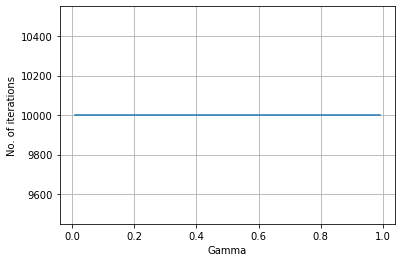

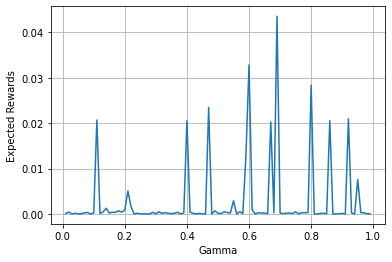

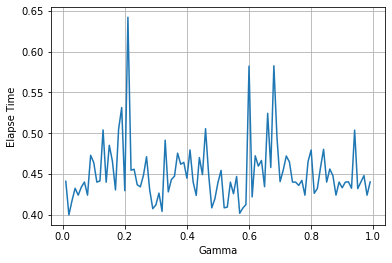

In [7]:
# Q Learning
mdp = 'Q Learning'

iterations_until_converge_gamma = []
expected_rewards_gamma = []
elapse_time_gamma = []

for g in gammas:
    ql = QLearning(probability_matrix, reward_matrix, gamma=g, alpha=0.99, epsilon=0.5, n_iter=10000)
    ql.run()
    iterations_until_converge_gamma.append(ql.max_iter)
    expected_rewards_gamma.append(np.mean(ql.V))
    elapse_time_gamma.append(ql.time)

title = mdp + " (Gamma) vs Iterations"

plt.plot(gammas, iterations_until_converge_gamma)
plt.xlabel('Gamma')
plt.ylabel('No. of iterations')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Gamma) vs Rewards"

plt.plot(gammas, expected_rewards_gamma)
plt.xlabel('Gamma')
plt.ylabel('Expected Rewards')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Gamma) vs Time"

plt.plot(gammas, elapse_time_gamma)
plt.xlabel('Gamma')
plt.ylabel('Elapse Time')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

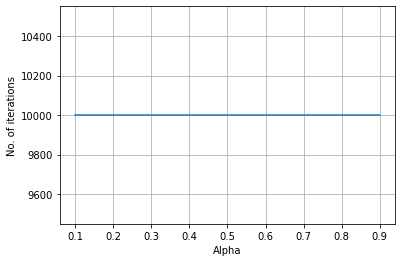

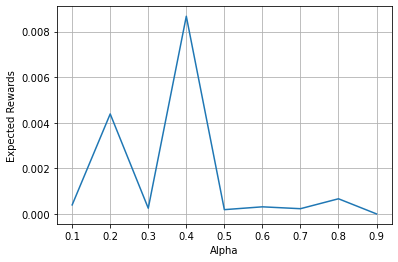

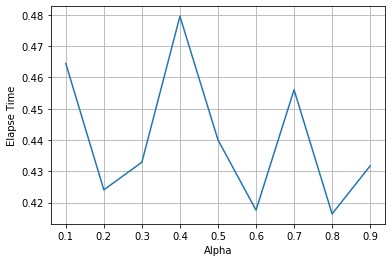

In [8]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

iterations_until_converge_alpha = []
expected_rewards_alpha = []
elapse_time_alpha = []

for a in alphas:
    ql = QLearning(probability_matrix, reward_matrix, gamma=0.99, alpha=a, epsilon=0.5, n_iter=10000)
    ql.run()
    iterations_until_converge_alpha.append(ql.max_iter)
    expected_rewards_alpha.append(np.mean(ql.V))
    elapse_time_alpha.append(ql.time)

title = mdp + " (alpha) vs Iterations"

plt.plot(alphas, iterations_until_converge_alpha)
plt.xlabel('Alpha')
plt.ylabel('No. of iterations')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (alpha) vs Rewards"

plt.plot(alphas, expected_rewards_alpha)
plt.xlabel('Alpha')
plt.ylabel('Expected Rewards')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (alpha) vs Time"

plt.plot(alphas, elapse_time_alpha)
plt.xlabel('Alpha')
plt.ylabel('Elapse Time')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

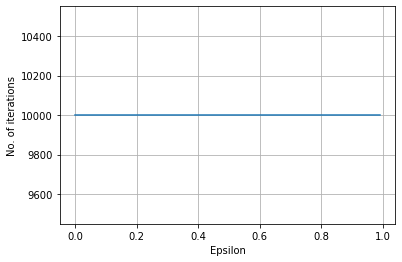

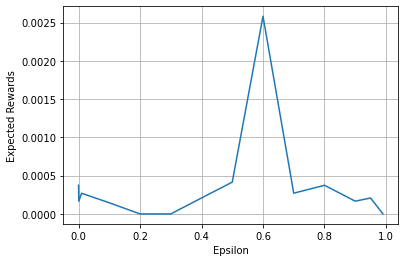

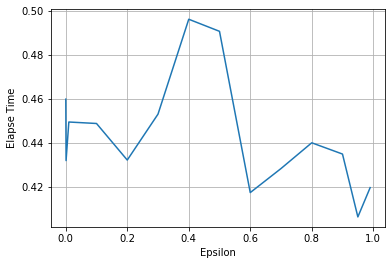

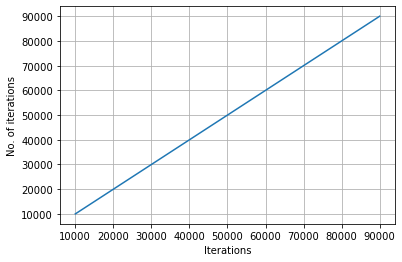

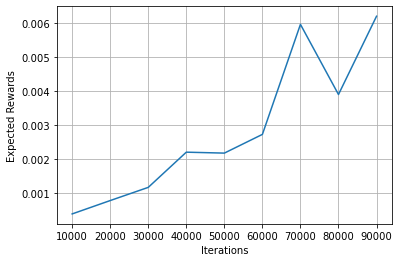

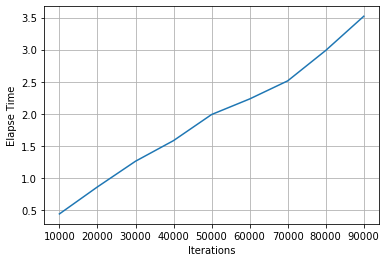

In [9]:
epsilons = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

iterations_until_converge_eps = []
expected_rewards_eps = []
elapse_time_eps = []

for e in epsilons:
    ql = QLearning(probability_matrix, reward_matrix, gamma=0.99, epsilon=e, n_iter=10000)
    ql.run()

    iterations_until_converge_eps.append(ql.max_iter)
    expected_rewards_eps.append(np.mean(ql.V))
    elapse_time_eps.append(ql.time)

title = mdp + " (Epsilon) vs Iterations"

plt.plot(epsilons, iterations_until_converge_eps)
plt.xlabel('Epsilon')
plt.ylabel('No. of iterations')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Epsilon) vs Rewards"

plt.plot(epsilons, expected_rewards_eps)
plt.xlabel('Epsilon')
plt.ylabel('Expected Rewards')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Epsilon) vs Time"

plt.plot(epsilons, elapse_time_eps)
plt.xlabel('Epsilon')
plt.ylabel('Elapse Time')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

n_iters = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

iterations_until_converge_iterations = []
expected_rewards_iterations = []
elapse_time_iterations = []

for n in n_iters:
    ql = QLearning(probability_matrix, reward_matrix, gamma=0.99, alpha=0.99, epsilon=0.0001, n_iter=n)
    ql.run()

    iterations_until_converge_iterations.append(ql.max_iter)
    expected_rewards_iterations.append(np.mean(ql.V))
    elapse_time_iterations.append(ql.time)

title = mdp + " (Epsilon) vs Iterations"

plt.plot(n_iters, iterations_until_converge_iterations)
plt.xlabel('Iterations')
plt.ylabel('No. of iterations')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Epsilon) vs Rewards"

plt.plot(n_iters, expected_rewards_iterations)
plt.xlabel('Iterations')
plt.ylabel('Expected Rewards')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " (Epsilon) vs Time"

plt.plot(n_iters, elapse_time_iterations)
plt.xlabel('Iterations')
plt.ylabel('Elapse Time')
plt.savefig('plots/frozenlake/' + problem + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

In [10]:
##Test Policy
gamma =0.99
n_episodes=10000

ql = QLearning(probability_matrix, reward_matrix, alpha = 0.9, epsilon = 0.001, gamma = 0.99, n_iter = 70000)
start_time = time.time()
ql.run()
end_time = time.time()
total_time = end_time - start_time
policy_for_test = ql.policy

test_expected_rewards_list = []
for episode in range(n_episodes):
    env_observation_init = frozen_lake_environment.reset()
    env_observation = env_observation_init[0]
    env_done = False
    cumulative_rewards = 0
    number_of_steps = 0
    while True:
        env_observation, env_reward, env_terminated, env_truncated,  \
        env_info  = frozen_lake_environment.step(policy_for_test[env_observation])
        if env_terminated is True or env_truncated is True:
            env_done = True
        cumulative_rewards += (gamma ** number_of_steps) * env_reward
        number_of_steps += 1
        if env_done:
            break
    test_expected_rewards_list.append(cumulative_rewards)
    
print("Optimal total reward : ", str(np.mean(test_expected_rewards_list)))

success_count = 0
number_of_steps_list = []
for episode in range(n_episodes):
    env_observation_init = frozen_lake_environment.reset()
    env_observation = env_observation_init[0]
    env_done = False
    
    number_of_steps = 0
    run = True
    while run:
        env_observation, env_reward, env_terminated, env_truncated,  \
        env_info  = frozen_lake_environment.step(policy_for_test[env_observation])
        if env_terminated is True or env_truncated is True:
            env_done = True
        number_of_steps += 1
        if env_done:
            run = False
            if env_reward == 1:
                number_of_steps_list.append(number_of_steps)
                success_count += 1

print("Number of steps : ", str(number_of_steps))
print("Number of steps (average) : ", str(np.mean(number_of_steps)))
success_rate = (success_count / n_episodes) * 100
print("Success rate : ", str(success_rate), "%")

print("Total run time : ", str(total_time))

Optimal total reward :  0.09712329779451707
Number of steps :  8
Number of steps (average) :  8.0
Success rate :  11.98 %
Total run time :  2.639085054397583
